In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
  
    forecast_col = f"Naive: {months_back}-Month for {text}"
    df[forecast_col] = np.nan

    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)

    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value

    return df


def getMetrics(df_d, df_r, date1, date2, forecast_type):
    month_name = pd.to_datetime(date1).strftime('%B')
    mask = (df_d.index >= date1) & (df_d.index <= date2)
    y_true = df_d.loc[mask, "Actual Rate"]
    y_pred = df_d.loc[mask, forecast_type]
    forecast_type_split = forecast_type.split(" f")
    if not y_true.isna().all() and not y_pred.isna().all():
        df_r.loc[month_name, f"{forecast_type_split[0]}: MAE"] = mean_absolute_error(y_true, y_pred)
        df_r.loc[month_name, f"{forecast_type_split[0]}: RMSE"] = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return df_r


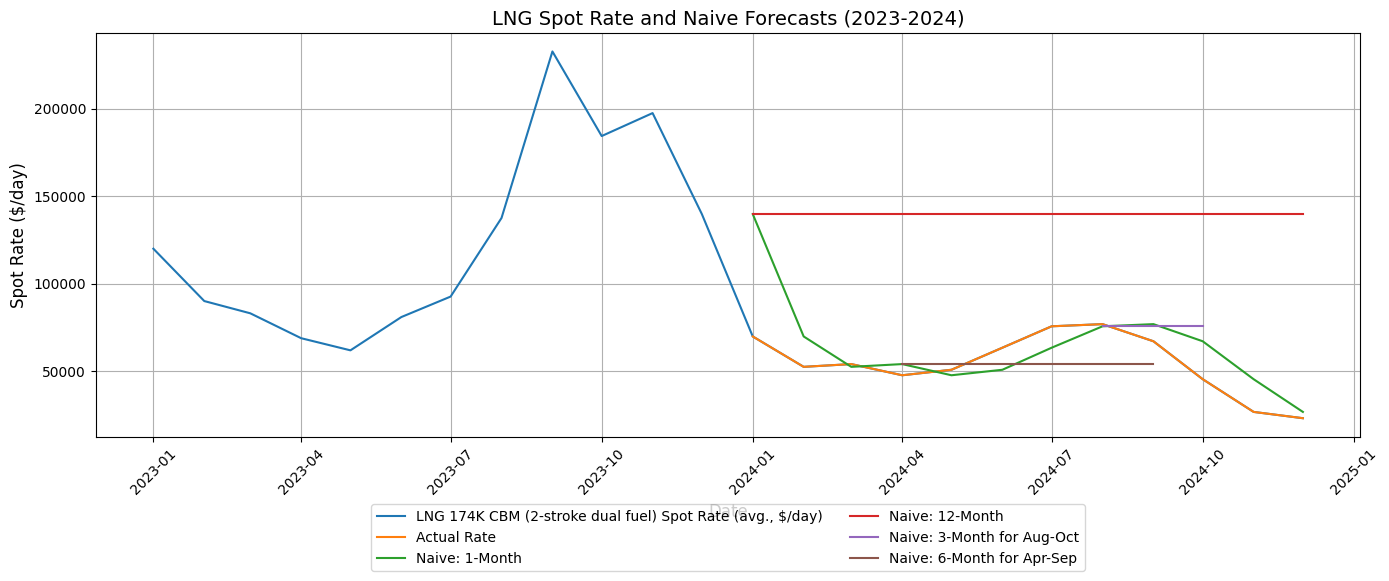

In [130]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')
target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = (df_forecast[target].loc[df_forecast.index >= '2024-01-01'])
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = (df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01'])
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'),"Naive: 12-Month"] = (df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1])
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-08-01', horizon_months=3, text="Aug-Oct")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-04-01', horizon_months=6, text="Apr-Sep")
#display(df_forecast.loc[df_forecast.index >= '2023-06-01'])
plot_df = df_forecast.loc['2023-01-01':]

# Plotting
plt.figure(figsize=(14, 6))
for column in plot_df.columns:
    plt.plot(plot_df.index, plot_df[column], label=column)

plt.title("LNG Spot Rate and Naive Forecasts (2023-2024)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Spot Rate ($/day)", fontsize=12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


,"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)",Actual Rate,Naive: 1-Month,Naive: 12-Month,Naive: 3-Month for Jan-Mar,Naive: 3-Month for Feb-Apr,Naive: 3-Month for Mar-May,Naive: 3-Month for Apr-Jun,Naive: 3-Month for May-Jul,Naive: 3-Month for Jun-Aug,...,Naive: 3-Month for Aug-Oct,Naive: 3-Month for Sep-Nov,Naive: 3-Month for Oct-Dec,Naive: 6-Month for Jan-Jun,Naive: 6-Month for Feb-Jul,Naive: 6-Month for Mar-Aug,Naive: 6-Month for Apr-Sep,Naive: 6-Month for May-Oct,Naive: 6-Month for Jun-Nov,Naive: 6-Month for Jul-Dec
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,91358.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,68721.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01,48349.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,48500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,64600.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,76800.000,76800.0,75562.5,139750.0,NaN,NaN,NaN,NaN,NaN,50700.0,...,75562.5,NaN,NaN,NaN,NaN,52375.0,53950.0,47562.5,50700.0,63312.5
2024-09-01,67000.000,67000.0,76800.0,139750.0,NaN,NaN,NaN,NaN,NaN,NaN,...,75562.5,76800.0,NaN,NaN,NaN,NaN,53950.0,47562.5,50700.0,63312.5
2024-10-01,45312.500,45312.5,67000.0,139750.0,NaN,NaN,NaN,NaN,NaN,NaN,...,75562.5,76800.0,67000.0,NaN,NaN,NaN,NaN,47562.5,50700.0,63312.5


,Naive: 1-Month: MAE,Naive: 1-Month: RMSE,Naive: 3-Month: MAE,Naive: 3-Month: RMSE,Naive: 6-Month: MAE,Naive: 6-Month: RMSE,Naive: 12-Month: MAE,Naive: 12-Month: RMSE
January,70000.0,70000.0,81058.333333,81437.154962,83475.000000,83832.332354,85422.916667,87031.788374
February,17375.0,17375.0,18454.166667,18653.112173,14443.750000,15715.941184,NaN,NaN
March,1575.0,1575.0,2687.500000,3079.307620,11102.083333,14619.143236,NaN,NaN
April,6387.5,6387.5,6333.333333,6807.326017,12752.083333,14711.357397,NaN,NaN
May,3137.5,3137.5,15629.166667,18636.043985,16302.083333,19491.950128,NaN,NaN
June,12612.5,12612.5,21191.666667,22048.651225,18227.083333,19722.889489,NaN,NaN
July,12250.0,12250.0,9808.333333,10732.704109,20741.666667,24638.987144,NaN,NaN
August,1237.5,1237.5,13350.000000,18165.079250,NaN,NaN,NaN,NaN
September,9800.0,9800.0,30495.833333,34677.286785,NaN,NaN,NaN,NaN
October,21687.5,21687.5,35362.500000,36690.178778,NaN,NaN,NaN,NaN


Naive: 1-Month: MAE      14864.583333
Naive: 1-Month: RMSE     14864.583333
Naive: 3-Month: MAE      23437.083333
Naive: 3-Month: RMSE     25092.684490
Naive: 6-Month: MAE      25291.964286
Naive: 6-Month: RMSE     27533.228705
Naive: 12-Month: MAE     85422.916667
Naive: 12-Month: RMSE    87031.788374
dtype: float64

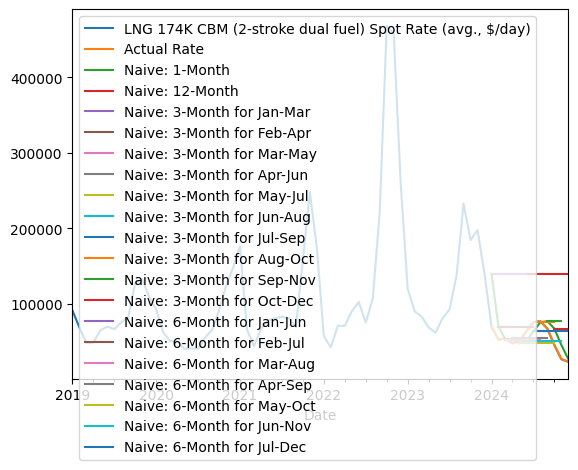

In [117]:
# Create 3-month naive forecast starting Jan 2024, filling Jan-Mar 2024
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-01-01', horizon_months=3, text="Jan-Mar")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-02-01', horizon_months=3, text="Feb-Apr")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-03-01', horizon_months=3, text="Mar-May")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-04-01', horizon_months=3, text="Apr-Jun")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-05-01', horizon_months=3, text="May-Jul")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-06-01', horizon_months=3, text="Jun-Aug")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-07-01', horizon_months=3, text="Jul-Sep")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-08-01', horizon_months=3, text="Aug-Oct")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-09-01', horizon_months=3, text="Sep-Nov")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-10-01', horizon_months=3, text="Oct-Dec")
# Create 6-month naive forecast starting Jan 2024, filling Jan-Jun 2024
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-01-01', horizon_months=6, text="Jan-Jun")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-02-01', horizon_months=6, text="Feb-Jul")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-03-01', horizon_months=6, text="Mar-Aug")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-04-01', horizon_months=6, text="Apr-Sep")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-05-01', horizon_months=6, text="May-Oct")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-06-01', horizon_months=6, text="Jun-Nov")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-07-01', horizon_months=6, text="Jul-Dec")

df_forecast.dropna()
#display(df_forecast)
df_forecast.plot()

display(df_forecast)
# Calculate evaluation metrics

# def getMetrics(df_d, df_r, date1, date2, forecast_type):
#     df_r[f"{forecast_type}: MAE"] = mean_absolute_error(df_d.loc[(df_d.index >= date1) & (df_d.index <= date2), "Actual Rate"], df_d.loc[(df_d.index >= date1) & (df_d.index <= date2),forecast_type])
#     df_r[f"{forecast_type}: MSE"] = np.sqrt(mean_squared_error(df_d.loc[(df_d.index >= date1) & (df_d.index <= date2),"Actual Rate"], df_d.loc[(df_d.index >= date1) & (df_d.index <= date2),forecast_type]))
#     return df_r

months = pd.date_range(start='2024-01-01', periods=12, freq='MS').strftime('%B')
df_metrics = pd.DataFrame(index=months)
for i in range (1,13):
    if i < 10:
        df_metrics = getMetrics(df_forecast, df_metrics, f"2024-0{i}-01", f"2024-0{i}-01", "Naive: 1-Month")
    else:
        df_metrics = getMetrics(df_forecast, df_metrics, f"2024-{i}-01", f"2024-{i}-01", "Naive: 1-Month")


df_metrics = getMetrics(df_forecast, df_metrics, "2024-01-01", f"2024-03-01", "Naive: 3-Month for Jan-Mar")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-02-01", f"2024-04-01", "Naive: 3-Month for Feb-Apr")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-03-01", f"2024-05-01", "Naive: 3-Month for Mar-May")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-04-01", f"2024-06-01", "Naive: 3-Month for Apr-Jun")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-05-01", f"2024-07-01", "Naive: 3-Month for May-Jul")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-06-01", f"2024-08-01", "Naive: 3-Month for Jun-Aug")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-07-01", f"2024-09-01", "Naive: 3-Month for Jul-Sep")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-08-01", f"2024-10-01", "Naive: 3-Month for Aug-Oct")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-09-01", f"2024-11-01", "Naive: 3-Month for Sep-Nov")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-10-01", f"2024-12-01", "Naive: 3-Month for Oct-Dec")

df_metrics = getMetrics(df_forecast, df_metrics, "2024-01-01", f"2024-06-01", "Naive: 6-Month for Jan-Jun")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-02-01", f"2024-07-01", "Naive: 6-Month for Feb-Jul")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-03-01", f"2024-08-01", "Naive: 6-Month for Mar-Aug")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-04-01", f"2024-09-01", "Naive: 6-Month for Apr-Sep")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-05-01", f"2024-10-01", "Naive: 6-Month for May-Oct")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-06-01", f"2024-11-01", "Naive: 6-Month for Jun-Nov")
df_metrics = getMetrics(df_forecast, df_metrics, "2024-07-01", f"2024-12-01", "Naive: 6-Month for Jul-Dec")

df_metrics = getMetrics(df_forecast, df_metrics, "2024-01-01", f"2024-12-01", "Naive: 12-Month")



display(df_metrics)
df_metrics.mean()


In [95]:
date1 = '2024-01-01'
date2 = '2024-12-01'
mae = mean_absolute_error(df_forecast.loc[(df_forecast.index >= date1) & (df_forecast.index <= date2), "Actual Rate"], df_forecast.loc[(df_forecast.index >= date1) & (df_forecast.index <= date2),"Naive: 1-Month"])
rmse = np.sqrt(mean_squared_error(df_forecast.loc[(df_forecast.index >= date1) & (df_forecast.index <= date2),"Actual Rate"], df_forecast.loc[(df_forecast.index >= date1) & (df_forecast.index <= date2),"Naive: 1-Month"]))
# Print results
print(f"Mean Absolute Error (MAE): ${mae:,.2f} per day")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f} per day")
# Create a list of month names
months = pd.date_range(start='2024-01-01', periods=12, freq='MS').strftime('%B')

# Create an empty DataFrame with months as the index
df_blank = pd.DataFrame(index=months)

# Optionally, add columns
df_blank['MAE'] = pd.NA
df_blank['RMSE'] = pd.NA

# Display the result
print(df_blank)

Mean Absolute Error (MAE): $14,864.58 per day
Root Mean Squared Error (RMSE): $23,265.12 per day
            MAE  RMSE
January    <NA>  <NA>
February   <NA>  <NA>
March      <NA>  <NA>
April      <NA>  <NA>
May        <NA>  <NA>
June       <NA>  <NA>
July       <NA>  <NA>
August     <NA>  <NA>
September  <NA>  <NA>
October    <NA>  <NA>
November   <NA>  <NA>
December   <NA>  <NA>
